# Drug Production

In [10]:
import numpy as np
from scipy.io import loadmat
from operator import itemgetter
import matplotlib.pyplot as plt
import cvxpy as cp
%matplotlib inline

In [69]:
mat = loadmat('cost_vec_data2.mat')
A, b, c_hat, rho, deltaC = itemgetter('A', 'b', 'c', 'rho', 'deltaC')(mat)
b, c_hat, rho = b[0], c_hat[0], rho[0][0]

## Part 1

In [63]:
def solve_nominal(A, b, c_hat):
    """
    Solves the nominal optimization problem which ignores uncertainty in c.
    
    Returns:
        x_nom: The nominal solution
        cost_nom: The cost of the nominal solution
    """
    x_nom = cp.Variable(4)
    objective = cp.Minimize(cp.sum(c_hat * x_nom))
    constraints = [
        A * x_nom <= b,
        x_nom >= 0
    ]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return x_nom.value, result

In [73]:
def worst_cost(x, c_hat, rho, deltaC):
    """
    Computes the worst case cost of a decision x.
    
    Returns:
        The worst case cost
    """
    costs = [np.dot(np.add(c_hat, np.multiply(rho, ck)), x) for ck in deltaC]
    return np.max(costs)

In [84]:
x_nom, cost_nom = solve_nominal(A, b, c_hat)
print('x_nom:\n{}'.format(x_nom))
print('profit_nom: {}'.format(-1. * cost_nom))
print('worst_profit: {}'.format(-1. * worst_cost(x_nom, c_hat, rho, deltaC)))

x_nom:
[4.95900359e-06 4.38788940e+02 1.75515577e+01 5.85913325e-10]
profit_nom: 8819.657742458643
worst_profit: 1515.528520317108


## Part 2

In [103]:
def solve_robust(A, b, c_hat, rho, deltaC):
    """
    Solves the robust optimization problem which considers uncertainty in c.
    
    Returns:
        x_rob: The robust solution
        cost_rob: The cost of the robust solution
    """
    x_rob = cp.Variable(4)
    t = cp.Variable(1)
    objective = cp.Minimize(t)
    constraints = [
        A * x_rob <= b,
        x_rob >= 0,
    ]
    rob_constraints = [t >= cp.sum((c_hat + np.multiply(rho, ck)) * x_rob) for ck in deltaC]
    all_constraints = constraints + rob_constraints
    prob = cp.Problem(objective, all_constraints)
    result = prob.solve()
    return x_rob.value, result

In [109]:
x_rob, cost_rob = solve_robust(A, b, c_hat, rho, deltaC)
print('x_rob:\n{}'.format(x_rob))
print('profit_rob: {}'.format(-1. * cost_rob))
print('worst_profit: {}'.format(-1. * worst_cost(x_rob, c_hat, rho, deltaC)))

x_rob:
[8.77192982e+02 4.48255474e-08 1.75438596e+01 4.02905624e-10]
profit_rob: 5689.9470812993395
worst_profit: 5689.947081802748


## Part 3

In [111]:
rhos = np.linspace(0.03, 0.09, 200)
profits = [solve_robust(A, b, c_hat, r, deltaC) for r in rhos]

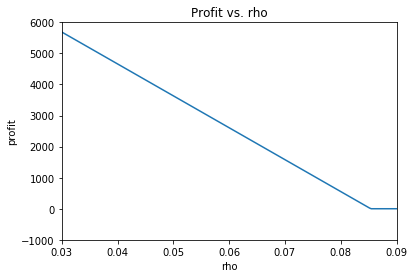

In [116]:
plt.figure()
plt.title('Profit vs. rho')
plt.plot(rhos, [-p[1] for p in profits])
plt.xlim(0.03, 0.09)
plt.ylim(-1000, 6000)
plt.xlabel('rho')
plt.ylabel('profit')
plt.savefig('problem5_profit_vs_rho.png', dpi=300)
plt.show()
plt.close()